In [1]:
import random
import numpy as np
from matplotlib import pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam
from torchvision.datasets.cifar import CIFAR10
from torch.utils.data import DataLoader, Subset
from torchvision.transforms import ToTensor
from tqdm import tqdm_notebook as tqdm
#from tqdm import tqdm
from pathlib import Path
import argparse

from DIM.models import Encoder
from DIM.util import display

In [5]:
#!mkdir data data/tv models models/run1
cur_dir = '/notebooks/DockerShared/MINE'
data_dir = '/notebooks/DockerShared/MINE/data/tv'
root = Path(cur_dir)
model_path = root / Path('models/run1')
encoder_path = model_path / Path('encoder990.wgt')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
batch_size = 128
# image size 3, 32, 32; batch size must be an even number; shuffle must be True
cifar_10_train_dt = CIFAR10(data_dir,  download=True, transform=ToTensor())
cifar_10_train_l = DataLoader(cifar_10_train_dt, batch_size=batch_size,
                              shuffle=True, drop_last=True,
                              pin_memory=torch.cuda.is_available())
encoder = Encoder().to(device)
encoder.load_state_dict(torch.load(str(encoder_path)))

Files already downloaded and verified


IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [6]:
# compute the latent space for each image and store in (latent, image)
minibatches = []
batch = tqdm(cifar_10_train_l, total=len(cifar_10_train_dt) // batch_size)
for images, target in batch:
    images = images.to(device)
    encoded, features = encoder(images)
    i = images.detach().cpu().unbind(0)
    e = encoded.detach().cpu().unbind(0)
    sublist = [elem for elem in zip(e, i)]
    minibatches.append(sublist)

# flatten the minibatches to a single list
ordered = []
for minibatch in minibatches:
    while minibatch:
        ordered.append(minibatch.pop())

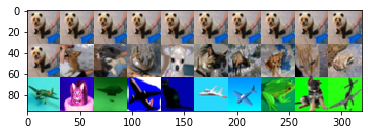

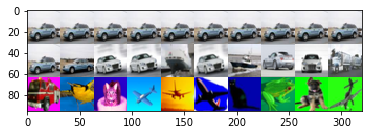

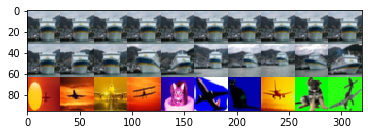

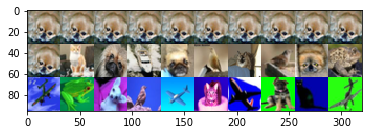

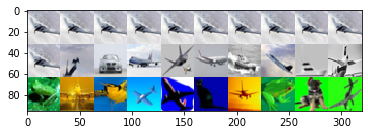

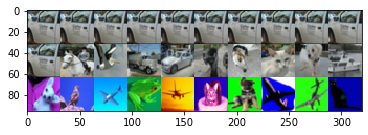

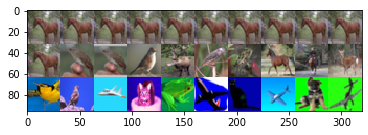

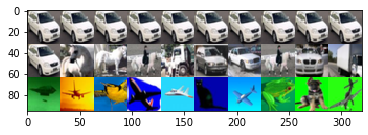

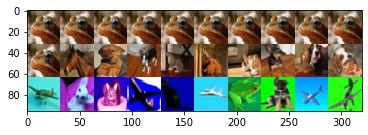

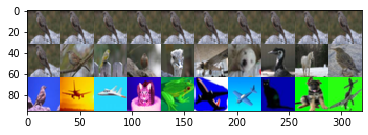

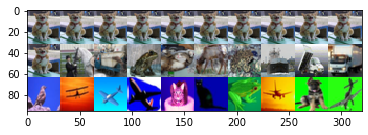

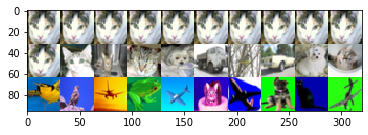

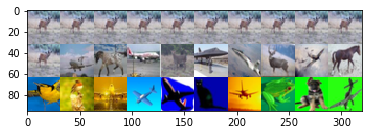

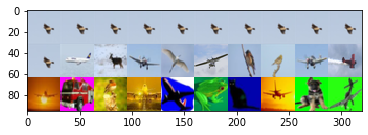

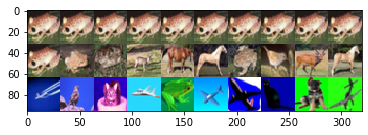

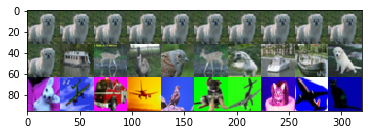

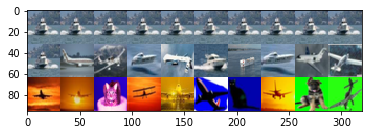

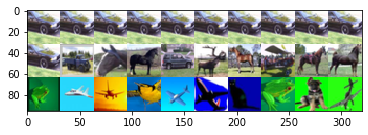

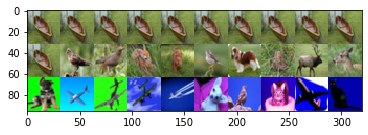

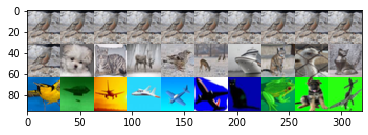

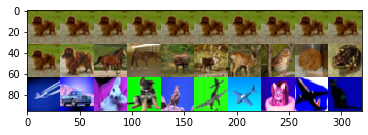

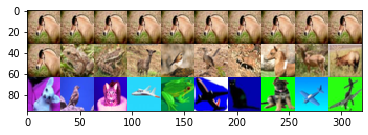

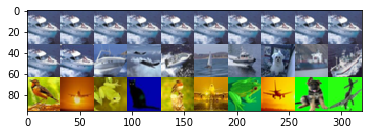

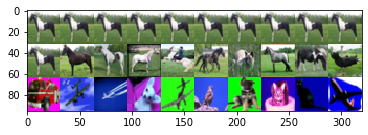

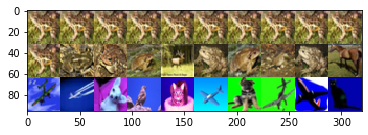

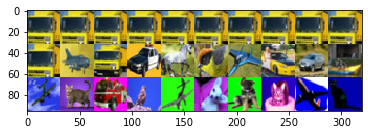

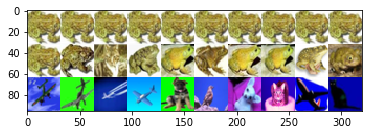

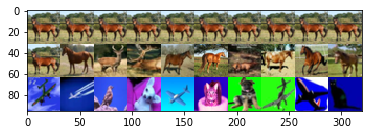

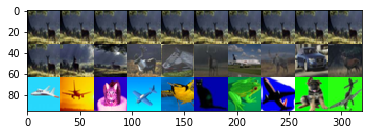

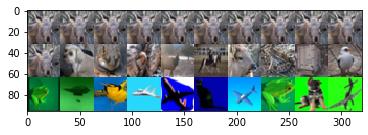

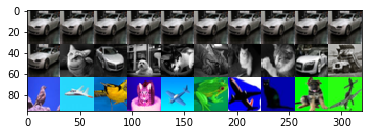

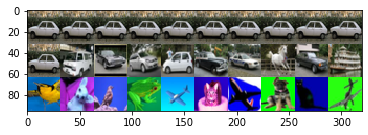

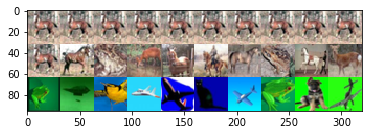

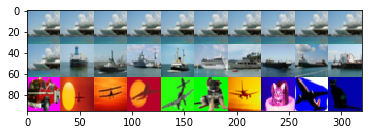

KeyboardInterrupt: 

In [8]:
while True:
    # pick a random image
    subject = ordered[random.randrange(0, len(ordered))]
    display(subject, ordered)